# Loss Functions

https://sparrow.dev/cross-entropy-loss-in-pytorch/

In [1]:
import torch
import torch.nn as nn

# Single-label binary
x = torch.randn(10)
yhat = torch.sigmoid(x)
y = torch.randint(2, (10,), dtype=torch.float)
loss = nn.BCELoss()(yhat, y)

# Single-label binary with automatic sigmoid
loss = nn.BCEWithLogitsLoss()(x, y)

# Single-label categorical
x = torch.randn(10, 5)
y = torch.randint(5, (10,))
loss = nn.CrossEntropyLoss()(x, y)

# Multi-label categorical
x = torch.randn(10, 5)
yhat = torch.sigmoid(x)
y = torch.randint(2, (10, 5), dtype=torch.float)
loss = nn.BCELoss()(y, y)

# Multi-label categorical with automatic sigmoid
loss = nn.BCEWithLogitsLoss()(x, y)

## Data loading and training loop

- dataset
- data loader
- epochs and minibatches

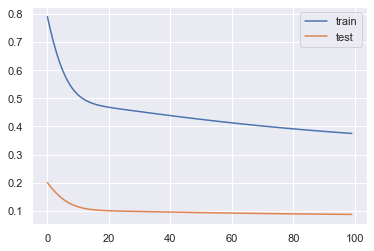

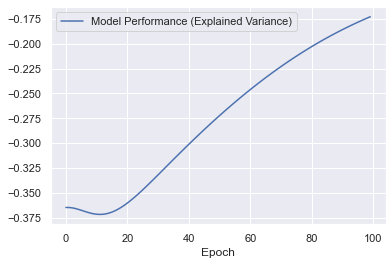

In [158]:
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader, random_split

from sklearn.metrics import accuracy_score, explained_variance_score, r2_score

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# data params
n_samples = 100
n_predictors = 10
n_outcomes = 2

# split params
train_size = int(n_samples * .8)
test_size = n_samples - train_size

# training params
n_epoches = 100
batch_size = 20

# DATA
X = torch.rand((n_samples, n_predictors))
y = torch.rand((n_samples, n_outcomes))

dataset = TensorDataset(X, y)
train_subset, test_subset = random_split(dataset, lengths=(train_size,test_size))

X_test, y_test = dataset[test_subset.indices]

model = nn.Linear(n_predictors, n_outcomes)
optimizer = torch.optim.Adam(model.parameters())
criterion = nn.MSELoss()

train_loss_trace = []
test_loss_trace = []
model_performance_trace = []

for epoch in range(n_epoches):

  # train
  model.train()
  train_epoch_loss = torch.tensor(0.)
  for X_batch, y_batch in DataLoader(train_subset, batch_size=batch_size):
    model.zero_grad()
    y_pred = model(X_batch)
    loss = criterion(y_batch, y_pred)
    train_epoch_loss += loss.detach().item()
    loss.backward()
    optimizer.step()

  train_loss_trace.append(train_epoch_loss.detach().item())

  # eval
  model.eval()
  test_epoch_accuracy = torch.tensor(0.)
  with torch.no_grad():
    y_pred = model(X_test)
    loss = criterion(y_test, y_pred)
    test_loss_trace.append(loss.detach().item())
    
    ev = explained_variance_score(y_test, y_pred)
    model_performance_trace.append(ev)

sns.lineplot(x=np.arange(n_epoches), y=train_loss_trace, label='train')
sns.lineplot(x=np.arange(n_epoches), y=test_loss_trace, label='test')
plt.xlabel('Epoch')
plt.show()

sns.lineplot(x=np.arange(n_epoches), y=model_performance_trace, label='Model Performance (Explained Variance)')
plt.xlabel('Epoch')
plt.show()
